# Lab 6, 7.04

Goal for today: learn to work with pandas. Take data and make it useful. As you have noticed often data is corrupted, so it often makes sense cleaning it up before actually doing something with it

TODO: Dodac cos jeszcze z https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_11_pandas_adding_data.ipynb i moze https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_12_pandas_groupby.ipynb

## Glossary of important functions and concepts in pandas for today

### Ops on DF
* X[col_name] 
* Select by mask (TRUE/FALSE vector)
* X.describe()
* X.head()
* X.sort(col_name, ascenidng)/sort_index(ascenidng=)
* X.hist/plot
* X[col_name].notnull()

### Ops on more than 1 DF
* concat
* join
* merge

In [30]:
mask = X['Age']<10

In [32]:
X = pd.read_csv("data/5/titanic_train.csv")
print X.describe()
print X[mask].head()
print X['Age'].notnull().head()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
    PassengerId  Survived  Pclass                                      Name  \
7 

<img src="https://imgs.xkcd.com/comics/headlines.png">

In [1]:
! pip install pandas-profiling

In [17]:
import pandas as pd
import pandas_profiling
import matplotlib.pylab as plt
%matplotlib inline
X = pd.read_csv("data/5/titanic_train.csv")

In [7]:
pandas_profiling.ProfileReport(X)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,7
Categorical,4
Date,0
Text (Unique),1
Rejected,0
Distinct count,89


# Exercise 1 (Titanic), 2 points
 * Load as csv data/5/titanic_train.csv
 * How many data points are there?
 * How many people were in first class?
 * What percentage of people survived? Plot histogram (x[x['Sex'] == 'female'] selects only female rows into separate dataframe)
 * What percentage of male survived?
 * Plot age histogram of 3 classes (hint: x.hist(what?, by=?))

## Simple processing and adding data

In [35]:
names = ['John', 'Matt', 'Sara', 'Jim', 'Ashley']
ids = [ 23, 34, 83, 86, 12]
balance = [10.2, 84.3, 72.9, 27.1, 223.1]

users = pd.DataFrame({'names':names, 'bal': balance}, index=ids)
print users

      bal   names
23   10.2    John
34   84.3    Matt
83   72.9    Sara
86   27.1     Jim
12  223.1  Ashley


## Dealing with Missing Values

Ignore
    * drop rows with missing values train.dropna(axis=0)
    * drop cols with missing values train.dropna(axis=1)
Fill
    * fill with average
    * fill with most common value
    * fill with a resonable estimate

### Fill

In [10]:
print X['Age'].mean()
print X['Age'].median()

29.6991176471
28.0


In [12]:
X['Age'][X['Age'].isnull()] = X['Age'].mean()
X['Age'].isnull().sum()

/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0

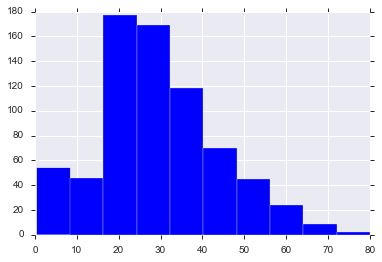

In [18]:
X['Age'].hist()

## Exercise 3. (Titanic age prediction)

Fill in age with prediction of age given other attributed

Use sklearn fit/predict and fit linear regression. Code to start is below

In [22]:
train = pd.read_csv('data/5/titanic_train.csv')
y = train['Age'][train['Age'].notnull()].values

Xframe = train[['Pclass','Sex','SibSp','Parch','Fare']][train['Age'].notnull()]
print Xframe.head()

   Pclass     Sex  SibSp  Parch     Fare
0       3    male      1      0   7.2500
1       1  female      1      0  71.2833
2       3  female      0      0   7.9250
3       1  female      1      0  53.1000
4       3    male      0      0   8.0500


In [23]:
Xframe.replace(['male','female'], [1,0], inplace=True)
print Xframe.head()

   Pclass  Sex  SibSp  Parch     Fare
0       3    1      1      0   7.2500
1       1    0      1      0  71.2833
2       3    0      0      0   7.9250
3       1    0      1      0  53.1000
4       3    1      0      0   8.0500


In [24]:
print Xframe.describe()

           Pclass         Sex       SibSp       Parch        Fare
count  714.000000  714.000000  714.000000  714.000000  714.000000
mean     2.236695    0.634454    0.512605    0.431373   34.694514
std      0.838250    0.481921    0.929783    0.853289   52.918930
min      1.000000    0.000000    0.000000    0.000000    0.000000
25%      1.000000    0.000000    0.000000    0.000000    8.050000
50%      2.000000    1.000000    0.000000    0.000000   15.741700
75%      3.000000    1.000000    1.000000    1.000000   33.375000
max      3.000000    1.000000    5.000000    6.000000  512.329200


In [25]:
from sklearn import linear_model
clf = linear_model.LinearRegression()